In [1]:
import cv2
import numpy as np
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.path as mplPath
import xml.etree.ElementTree as ET
import Util
from skimage import img_as_ubyte

In [2]:
folderPageImages = 'parzivalDataset'; 
folderGroundThruth = 'groundTruth'
ximg_train = []; ximg_test = []; ximg_validation = [];
ximg_train_superpixels = [];
ximgresized_train = []; ximgresized_test = []; ximgresized_validation = [];
xgt_train = []; xgt_test = []; xgt_validation = [];
x_train = []; y_train = []
x_test = []; y_test = []
x_va = []; y_va = []
x = []; y = []


#### Leyendo las imágenes de los documentos y sus respectivos archivos XML que contienen los segmentos (ground truth) como coordenadas de polígonos


In [3]:
ximg_train,      xgt_train      = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'train')     
ximg_test,       xgt_test       = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'test')
ximg_validation, xgt_validation = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'validation')


####  Reduciendo las imágenes a escala

In [4]:
ximgresized_train = Util.resizeImages(ximg_train, 2**-3)
ximgresized_test = Util.resizeImages(ximg_train, 2**-3)
ximgresized_validation = Util.resizeImages(ximg_train, 2**-3)

index 7 to samples

#### Segmentando las imágenes en super píxeles, usando la técnica de SLIC

In [23]:
ximg_train_superpixels = Util.segmentImageInSuperpixels([ximg_train[7]], 3000)

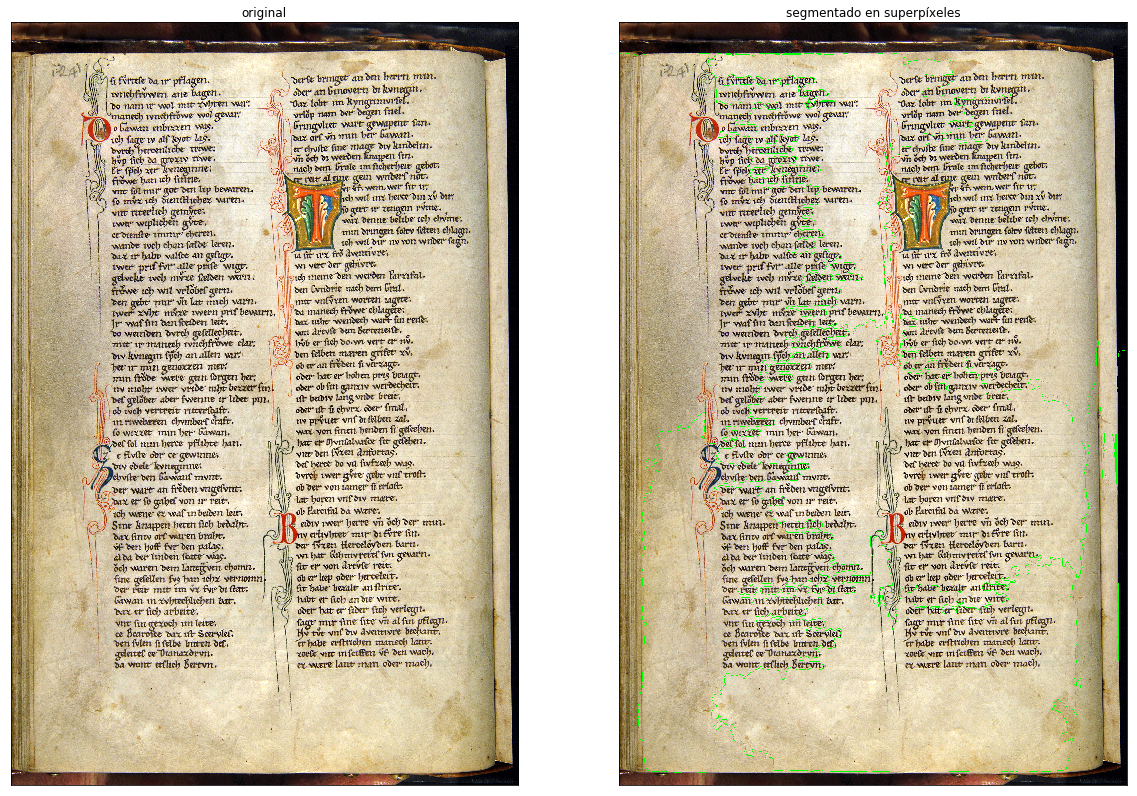

In [15]:
image = ximg_train[7]
imgSegmented = mark_boundaries(image, ximg_train_superpixels[0], color=(0, 1, 0), outline_color=None, mode='outer', background_label=0)
Util.subplot(titles=['original','segmentado en superpíxeles'], images = [image, imgSegmented], rows = 1, imgPerRows = 2, size = 20)

In [20]:
imageCopy = img_as_ubyte(image)
segments = ximg_train_superpixels[0]
for (j , segVal) in enumerate(np.unique(segments)):
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    mask[segments == segVal] = 255
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
    #############
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    #############
    x,y,w,h = cv2.boundingRect(c)
    roi = image[y:y+h, x:x+w]
    cv2.circle(imageCopy, (cX, cY), 10, (0, 0, 255), -1)
    #cv2.rectangle(imageCopy,(x,y),(x+w,y+h),(255,0,0),2)    

D:\wynpython_36_home\python-3.5.3.amd64\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


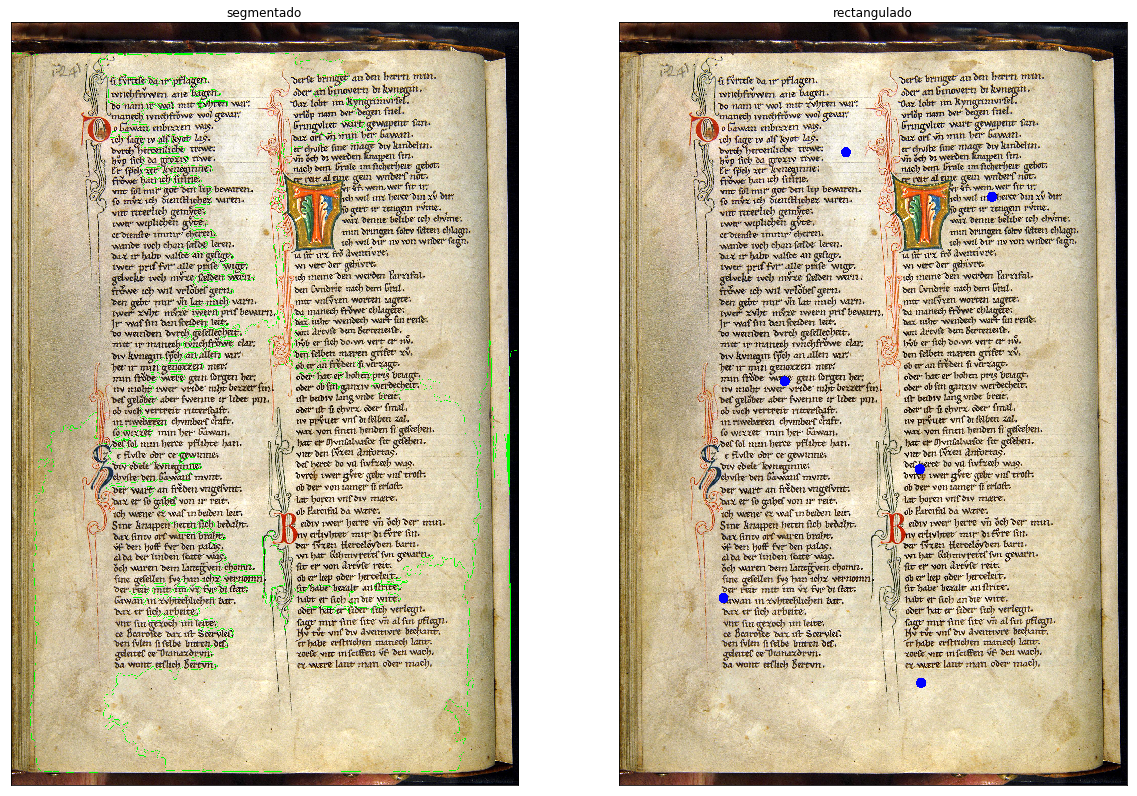

In [21]:
Util.subplot(titles=['segmentado','rectangulado'], images = [imgSegmented, imageCopy], rows = 1, imgPerRows = 2, size = 20)

In [22]:
print(np.shape(roi))
print(np.unique(segments))
print(np.shape(segments))


(854, 1459, 3)
[0 1 2 3 4 5]
(3008, 2000)
